In [1]:
pip install yfinance scipy seaborn matplotlib


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Updated list of tech and consumer discretionary stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'ORCL', 'IBM', 'INTC', 'CSCO']

# Download adjusted closing prices
data = yf.download(tickers, start='2023-01-01', end='2024-01-01')['Adj Close']

# Drop rows with NaN values (if any)
data.dropna(inplace=True)
print(data.head())


[*********************100%***********************]  8 of 8 completed

Ticker                           AAPL       AMZN       CSCO      GOOGL  \
Date                                                                     
2023-01-03 00:00:00+00:00  123.904633  85.820000  45.047882  88.899872   
2023-01-04 00:00:00+00:00  125.182610  85.139999  45.038406  87.862442   
2023-01-05 00:00:00+00:00  123.855095  83.120003  44.403801  85.987076   
2023-01-06 00:00:00+00:00  128.412216  86.080002  45.767735  87.124260   
2023-01-09 00:00:00+00:00  128.937271  87.360001  46.014004  87.802582   

Ticker                            IBM       INTC        MSFT       ORCL  
Date                                                                     
2023-01-03 00:00:00+00:00  131.173401  25.775145  236.183533  81.470894  
2023-01-04 00:00:00+00:00  132.146454  26.691208  225.852112  82.210472  
2023-01-05 00:00:00+00:00  130.765656  26.575495  219.158356  82.045029  
2023-01-06 00:00:00+00:00  133.165787  27.703699  221.741211  83.358772  
2023-01-09 00:00:00+00:00  133.026779

In [10]:
# Calculate daily returns
returns = data.pct_change().dropna()
print(returns.head())


Ticker                         AAPL      AMZN      CSCO     GOOGL       IBM  \
Date                                                                          
2023-01-04 00:00:00+00:00  0.010314 -0.007924 -0.000210 -0.011670  0.007418   
2023-01-05 00:00:00+00:00 -0.010605 -0.023726 -0.014090 -0.021344 -0.010449   
2023-01-06 00:00:00+00:00  0.036794  0.035611  0.030717  0.013225  0.018354   
2023-01-09 00:00:00+00:00  0.004089  0.014870  0.005381  0.007786 -0.001044   
2023-01-10 00:00:00+00:00  0.004457  0.028732  0.004734  0.004544  0.008708   

Ticker                         INTC      MSFT      ORCL  
Date                                                     
2023-01-04 00:00:00+00:00  0.035541 -0.043743  0.009078  
2023-01-05 00:00:00+00:00 -0.004335 -0.029638 -0.002012  
2023-01-06 00:00:00+00:00  0.042453  0.011785  0.016012  
2023-01-09 00:00:00+00:00  0.020188  0.009736  0.012655  
2023-01-10 00:00:00+00:00  0.004435  0.007617  0.000926  


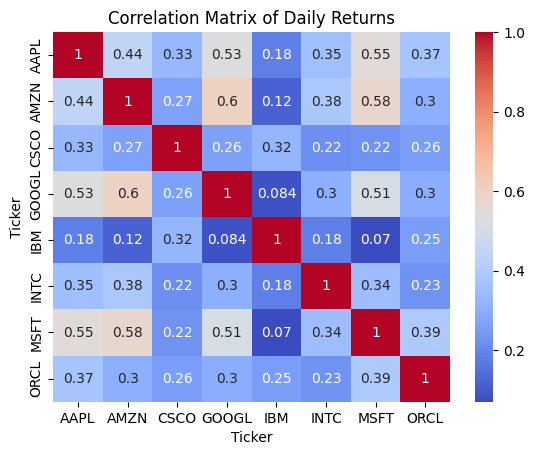

In [11]:
# Correlation matrix
correlation_matrix = returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Daily Returns")
plt.show()


<ipython-input-12-e4eb6cfd37da>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='ward')


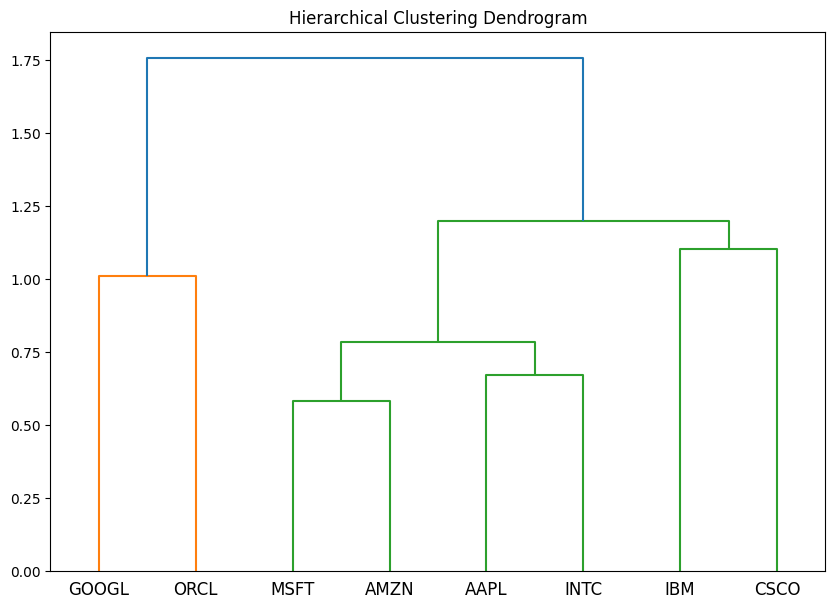

In [12]:
# Perform hierarchical clustering
distance_matrix = 1 - correlation_matrix  # Use 1 - correlation as a distance metric
linked = linkage(distance_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=tickers)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [13]:
# Set the clustering threshold
threshold = 1.0  # Adjust this based on the dendrogram

# Get cluster labels
clusters = fcluster(linked, t=threshold, criterion='distance')
clustered_stocks = pd.DataFrame({'Stock': tickers, 'Cluster': clusters})
print(clustered_stocks)

# Group stocks by clusters
for cluster in clustered_stocks['Cluster'].unique():
    cluster_stocks = clustered_stocks[clustered_stocks['Cluster'] == cluster]['Stock'].tolist()
    print(f"Cluster {cluster}: {cluster_stocks}")


   Stock  Cluster
0   AAPL        3
1   MSFT        3
2  GOOGL        1
3   AMZN        3
4   ORCL        2
5    IBM        4
6   INTC        3
7   CSCO        5
Cluster 3: ['AAPL', 'MSFT', 'AMZN', 'INTC']
Cluster 1: ['GOOGL']
Cluster 2: ['ORCL']
Cluster 4: ['IBM']
Cluster 5: ['CSCO']


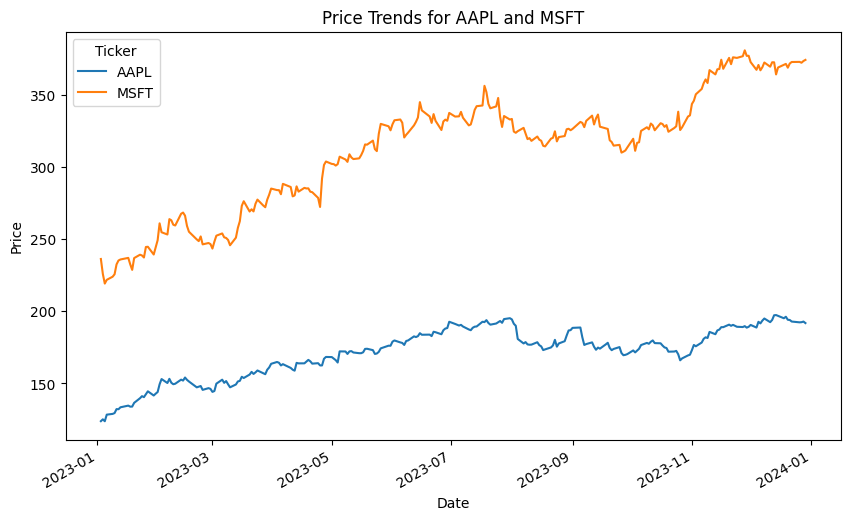

In [14]:
# Example of plotting two stocks from the same cluster
pair = ('AAPL', 'MSFT')  # Replace with stocks from the same cluster

data[list(pair)].plot(figsize=(10, 6))
plt.title(f"Price Trends for {pair[0]} and {pair[1]}")
plt.ylabel("Price")
plt.show()
